In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import pydotplus 
from pandas import DataFrame,Series
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

input_folder = "../dataset"
#file_path = "../dataset/movie_metadata_cleaned_filled_values.csv"
#file_path =  "../dataset/movie_metadata_cleaned_tfidf_num_only_min.csv"
file_path =  "../dataset/movie_metadata_cleaned_categ_num_only.csv"
#file_path = "../dataset/movie_metadata_cleaned_no_vector_num_only.csv"

#movie_file = pd.read_csv(file_path)
#movie_data= DataFrame(movie_file)
#movie_data.fillna(movie_data.mean())
#movie_data = movie_data.dropna()

dta = pd.read_csv(file_path)
dta_clean = dta
#remove the null values, that is fill NaN with there - FIXME: Rihards, naive implementation
dta_clean = dta_clean.fillna(value=0, axis=1)
dta_clean = dta_clean.dropna()
dta_clean = dta_clean.drop('Unnamed: 0', axis=1)
dta_clean.describe()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,blockbuster_month,cast_total_facebook_likes,director_facebook_likes,dump_month,duration,imdb_score,movie_facebook_likes,...,raiting_pg,raiting_pg13,raiting_r,raiting_tv14,raiting_tvg,raiting_tvma,raiting_tvpg,raiting_tvy7,raiting_unrated,raiting_x
count,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,...,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000,4812.000000
mean,6801.628221,1720.181629,662.147548,0.368869,10068.043225,742.647756,0.219659,106.889443,6.417249,8067.969659,...,0.141521,0.297589,0.427265,0.003741,0.001455,0.002702,0.001870,0.000208,0.011222,0.000416
std,15654.706536,4105.115266,1665.732147,0.482549,18756.607185,2934.558160,0.414059,21.994601,1.105504,20009.801260,...,0.348595,0.457245,0.494733,0.061053,0.038117,0.051912,0.043211,0.014416,0.105349,0.020385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,644.750000,310.000000,154.000000,0.000000,1563.250000,8.000000,0.000000,93.000000,5.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,628.000000,389.000000,0.000000,3258.000000,53.000000,0.000000,103.000000,6.500000,192.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12000.000000,942.000000,650.000000,1.000000,14618.750000,212.000000,0.000000,118.000000,7.200000,7000.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,713000.000000,137000.000000,23000.000000,1.000000,729779.000000,33000.000000,1.000000,227.000000,9.600000,353000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
drop_predictors = ['gross','worldwide_gross','color','movie_title','director_name',
                   'actor_1_name','actor_2_name','actor_3_name','content_rating',
                   'genres','plot_keywords','movie_imdb_link','country','language',
                   'release_date','title_year','aspect_ratio']

movie_data = dta_clean

#define predictors and predicted values
X = movie_data.drop('worldwide_gross', axis=1)
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

# This model is part of the family of algorithms for large-scale learning. 
# It is similar to the Perceptron. However, contrary to the Perceptron, 
# it includes a regularization parameter C
reg_model = PassiveAggressiveRegressor(C=0.001, n_iter=20)

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


PassiveAggressiveRegressor(C=0.001, epsilon=0.1, fit_intercept=True,
              loss='epsilon_insensitive', n_iter=20, random_state=None,
              shuffle=True, verbose=0, warm_start=False)

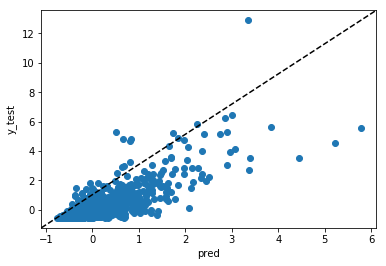

In [3]:
pred = reg_model.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [4]:
#Metrics
print("MSE: {0:0.4f}".format(mean_squared_error(y_test, pred)))
print("R2:  {0:0.4f}".format(r2_score(y_test, pred, multioutput='variance_weighted')))

MSE: 0.3441
R2:  0.6387
